In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch

In [ ]:
cd /content/drive/MyDrive/Yolov5x-MIG2

/content/drive/MyDrive/Yolov5x-MIG2


In [ ]:
import PIL
from PIL import Image
import cv2
import skimage
from skimage import morphology
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import math
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from skimage.morphology import skeletonize
from skimage import morphology, filters

In [ ]:
real_img1 = cv2.imread('/content/WIN_20220213_12_52_08_Pro.jpg')
z = 0
results = model('/content/WIN_20220213_12_52_08_Pro.jpg')
aa = results.pred

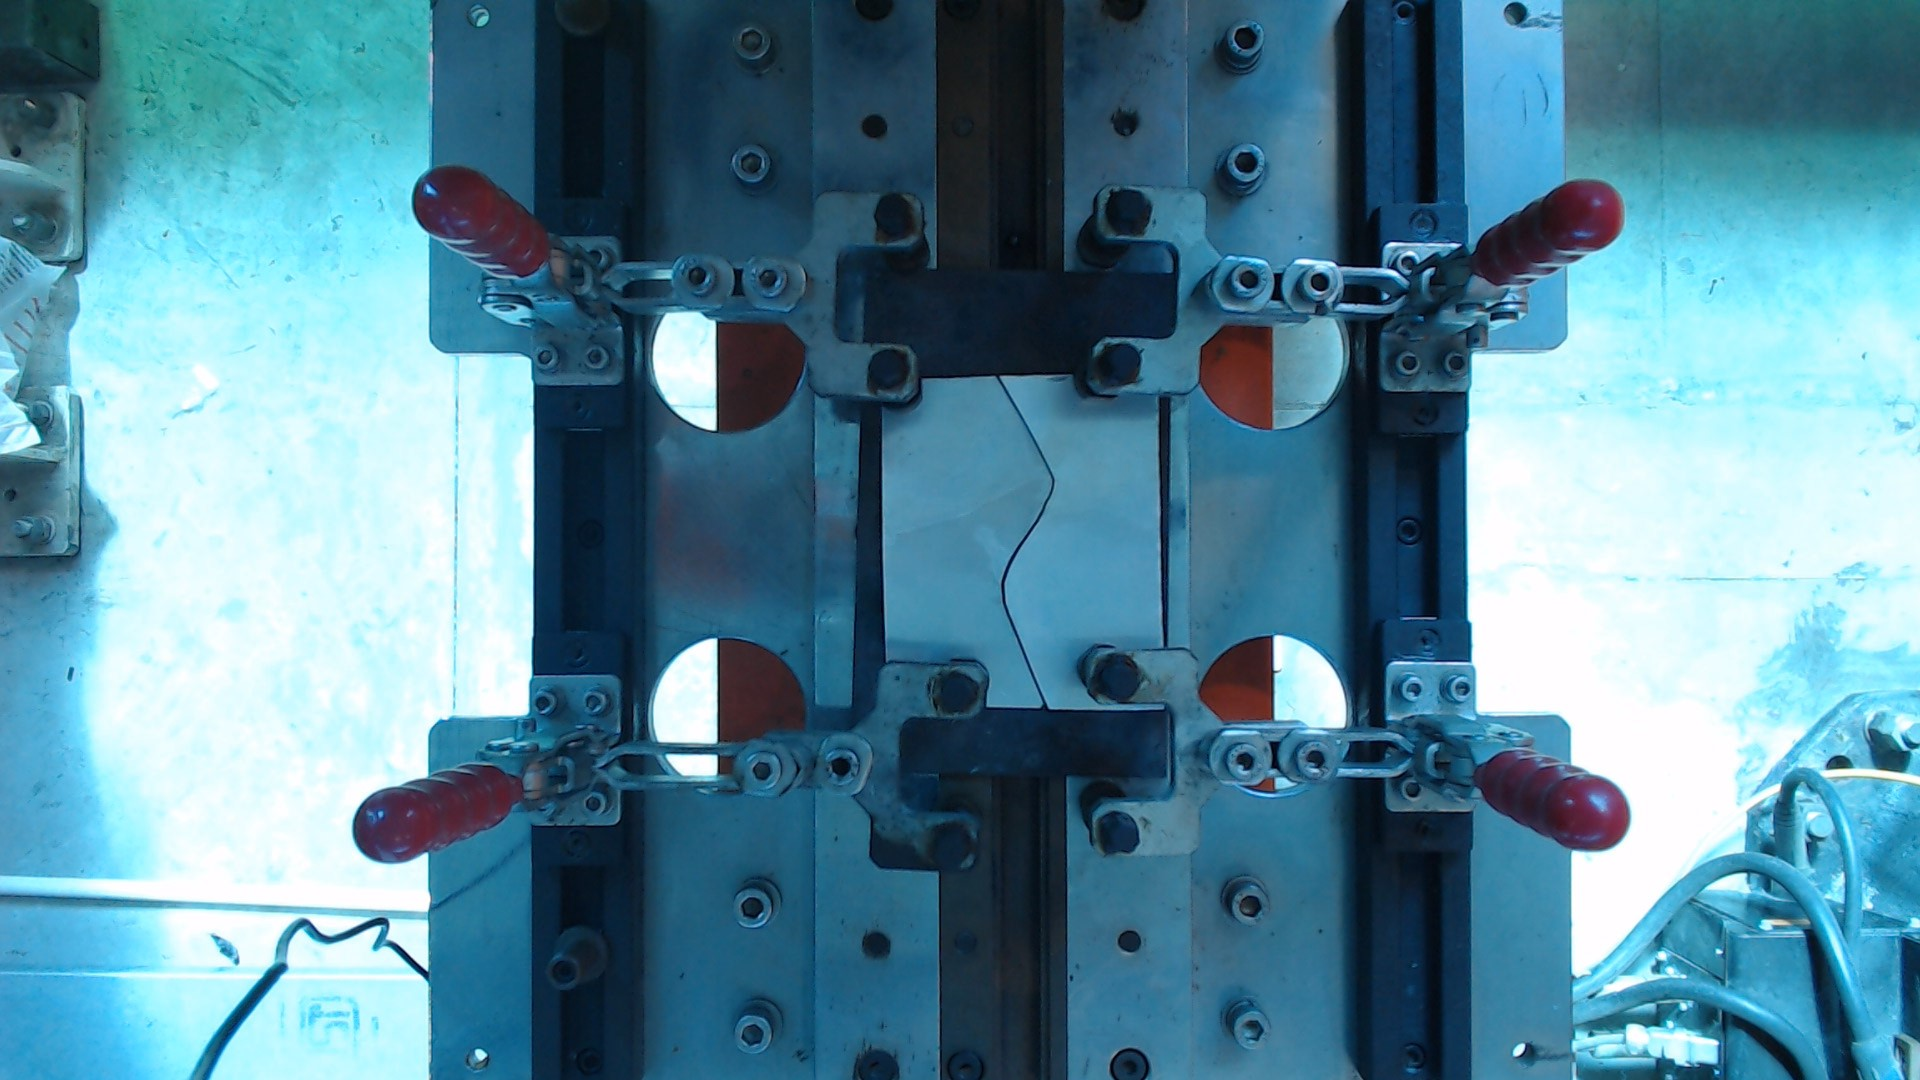

In [ ]:
cv2_imshow(real_img1)

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom' ,path = 'yolov5/runs/train/exp/weights/best.pt',force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-5-12 torch 1.11.0+cu113 CPU

Fusing layers... 
Model summary: 444 layers, 86173414 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
def rodrigues_vec_to_rotation_mat(rodrigues_vec): 
     return cv2.Rodrigues(rodrigues_vec)
mtx = np.array([[2.38698321e+03, 0.00000000e+00, 9.56014274e+02],
       [0.00000000e+00, 2.38776796e+03, 5.39775041e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist_coeff = np.array([[-1.56833787e-02,  6.96231928e+00, -9.67262021e-05,
        -2.48113560e-05, -1.28629777e+02]])


#success, rvecs, tvecs = cv2.solvePnP(points_3D, points_2D, mtx, dist_coeff, flags=0)
rvecs = np.array([[-0.06473412],
       [-0.01011068],
       [-0.02586902]])
tvecs = np.array([[-5.52259823],
       [-0.10674712],
       [47.30035823]])


(a, jacobian)=cv2.Rodrigues(rvecs)

matrix = np.append(a,tvecs,axis = 1)   
result = np.dot(mtx,matrix) 
result = np.delete(result,2,1) 
inverse = np.linalg.inv(result)

In [ ]:
def findIntersection(x1,y1,x2,y2,x3,y3,x4,y4):
        x = ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) ) 
        y= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
        return x,y

In [ ]:
def borders(img1,lines,edges,area):
  vline1 = []
  vline = []
  hline = []
  hline1 = []

  if img1.shape[1]>img1.shape[0]:
    for line in lines:
      for l in line:
        if l[0] <= img1.shape[1]/7 and l[2] <= img1.shape[1]/7:
                if l[1]==l[3]:
                  pass
                elif l[0]==l[2] :
                  start_point = (l[0],l[1])
                  end_point = (l[2],l[3])
                  color = (0,0,0)
                  canny = cv2.line(edges, start_point, end_point, color, 5) 
                  area = cv2.line(area, start_point, end_point, color, 5)
                  vline.append(l)
                else:  
                  fit = np.polyfit((l[0],l[2]),(l[1],l[3]),1)
                
                  slope = fit[0]
                  slope1 =  math.degrees(math.atan(slope))
                  
                  if abs(slope1)>75 and abs(slope1)<90:
                    start_point = (l[0],l[1])
                    end_point = (l[2],l[3])
                    color = (0,0,0)
                    canny = cv2.line(edges, start_point, end_point, color, 5) 
                    area = cv2.line(area, start_point, end_point, color, 5)
                    vline.append(l)
  
  cv2_imshow(edges)
  cv2_imshow(area)
  line_image = np.copy(img1)*0
  if img1.shape[1]>img1.shape[0]:
    for line in lines:
      for l in line:
          
        if l[0] >= (img1.shape[1]- img1.shape[1]/7) and l[2] >= (img1.shape[1]- img1.shape[1]/7):
          if l[1]==l[3]:
            pass
          elif l[0]==l[2] :
            start_point = (l[0],l[1])
            end_point = (l[2],l[3])
            color = (0,0,0)
            edges = cv2.line(edges, start_point, end_point, color, 5) 
            area = cv2.line(area, start_point, end_point, color, 5)
            vline1.append(l)
          else:
              fit = np.polyfit((l[0],l[2]),(l[1],l[3]), 1)
            

              slope = fit[0]
              slope1 =  math.degrees(math.atan(slope))
              
              if abs(slope1)>75 and abs(slope1)<90:
                start_point = (l[0],l[1])
                end_point = (l[2],l[3])
                color = (0,0,0)
                edges = cv2.line(edges, start_point, end_point, color, 5) 
                area = cv2.line(area, start_point, end_point, color, 5)
                vline1.append(l)   
  
  cv2_imshow(edges)
  cv2_imshow(area)
  line_image = np.copy(img1)*0
  if img1.shape[1]<img1.shape[0]:
    for line in lines:
      for l in line:   
        if l[1] <= img1.shape[0]/7 and l[3] <= img1.shape[0]/7:
          if l[0]==l[2]:
            pass
          elif l[1]==l[3] :
            start_point = (l[0],l[1])
            end_point = (l[2],l[3])
            color = (0,0,0)
            edges = cv2.line(edges, start_point, end_point, color, 5) 
            area = cv2.line(area, start_point, end_point, color, 5)
            hline.append(l) 
          else:  
            fit = np.polyfit((l[0],l[2]),(l[1],l[3]), 1)
            

            slope = fit[0]
            slope1 =  math.degrees(math.atan(slope))
            
            
            if abs(slope1)>0 and abs(slope1)<10:
              start_point = (l[0],l[1])
              end_point = (l[2],l[3])
              color = (0,0,0)
              edges = cv2.line(edges, start_point, end_point, color, 5) 
              area = cv2.line(area, start_point, end_point, color, 5)
              hline.append(l)

  cv2_imshow(edges)
  cv2_imshow(area)

  

  

  line_image = np.copy(img1)*0
  if img1.shape[1]<img1.shape[0]:
    for line in lines:
      for l in line:    
        if l[1] >= (img1.shape[0]- img1.shape[0]/7) and l[3] >= (img1.shape[0]- img1.shape[0]/7):
          if l[0]==l[2]:
            pass

          elif  l[1]==l[3]  :
            start_point = (l[0],l[1])
            end_point = (l[2],l[3])
            color = (0,0,0)
            edges = cv2.line(edges, start_point, end_point, color, 5) 
            area = cv2.line(area, start_point, end_point, color, 5) 
            hline1.append(l)
          else:
            fit = np.polyfit((l[0],l[2]),(l[1],l[3]), 1)
            

            slope = fit[0]
            slope1 =  math.degrees(math.atan(slope))
            print(slope1)
            
            
            if abs(slope1)>0and abs(slope1)<10:
              start_point = (l[0],l[1])
              end_point = (l[2],l[3])
              color = (0,0,0)
              edges = cv2.line(edges, start_point, end_point, color, 5) 
              area = cv2.line(area, start_point, end_point, color, 5)
              hline1.append(l)  
  return vline,vline1,hline,hline1,edges,area  

In [ ]:
def series(corners,image):
    y = []
    a = min(corners)
    for items in corners:
      y.append(items[1])

    for i in range(len(corners)):
      if corners[i][1]==min(y):
        b = i
    corners2 = corners
    corners3 = corners2

    #img10 = img1.copy()

    points1h = []
    pointsv = []

    res = []
    points = []
    points1 = []
    end_point = (a[0],a[1])
    length = len(corners)
    final = []

    if image.shape[0]<image.shape[1]:
      for j in range(length):
        p0 = end_point

        score = 10000
        for items in corners:
        

          #for i in range(len(items)):
            

        
            p1 = (int(items[0]),int(items[1]))


            dist = (((p0[0] - p1[0])**2) + ((p0[1] - p1[1])**2))**.5
            if dist < score and dist!= 0 :
              if dist <= 20 : 
                score = dist 
            
                end_point = (int(items[0]),int(items[1]))#and  p0[0] > p1[0]:
                
            
            
        start_point = p0
        points.append([start_point[0],start_point[1],end_point[0],end_point[1]])
        for i in points:
          if i not in final:
            final.append(i)   
        #img10 = cv2.line(img10,start_point,end_point,(255,0,0),1)
        points.append([start_point[0],start_point[1],end_point[0],end_point[1]])
        res.append([start_point[0],start_point[1]])

        pointsv.append([start_point[0],start_point[1]])

      
      #corners.remove([start_point[0],start_point[1])
        corners1= []
        for i in corners:
            if i not in res:
                corners1.append(i)
        corners = corners1 
        res = []  
    else:
      points = []
      corners=corners3
      res = []
      points = []
      end_point = (corners[b][0],corners[b][1])
      length = len(corners)
      final = []


      for j in range(length):
        p0 = end_point

        score = 10000
        for items in corners:
      

        #for i in range(len(items)):
          

      
            p1 = (int(items[0]),int(items[1]))


            dist = (((p0[0] - p1[0])**2) + ((p0[1] - p1[1])**2))**.5
            if dist < score and dist!= 0 :
              if dist <= 80 : 
                score = dist 
          
                end_point = (int(items[0]),int(items[1]))#and  p0[0] > p1[0]:
              
          
          
        start_point = p0
        #print(start_point,end_point) 
        points1.append([start_point[0],start_point[1],end_point[0],end_point[1]])
        points1h.append([start_point[0],start_point[1]])
        
        #img10 = cv2.line(img10,start_point,end_point,(255,0,0),1)
        res.append([start_point[0],start_point[1]])

    
    #corners.remove([start_point[0],start_point[1])
        corners1= []
        for i in corners:
            if i not in res:
                corners1.append(i)
        corners = corners1 
        res = []

    pointsd = []
    for i in points:
      if i not in pointsd:
        pointsd.append(i)
    points1d = []
    for i in points1:
      if i not in points1d:
        points1d.append(i)
    points = pointsd
    points1 = points1d
    return points,points1 

In [ ]:
def extension(points,points1,vline,vline1,hline,hline1,img10):
  e1 = ''
  e2 = ''
  e3 = ''
  e4 = ''

  if len(points)!= 0:
    if len(vline)!=0:
      xv_1 = []
      xv_2 = []
      yv= []
      yv = []
      sv =[]
      interv = []
      line1 = []
      line2 = []
      for i in vline:
       if i[0]!=0 and i[2]!=0:
          fit = np.polyfit((i[0],i[2]),(i[1],i[3]), 1)
          print(fit[0],'ok')
                  
          sv.append(fit[0])
                
          interv.append(fit[1])
          xv_1.append(i[0])
          xv_2.append(i[2])
          yv.append(i[1])
          yv.append(i[3])

                  

      s_avg = np.average(sv)
      inter_avg = np.average(interv)   
      yv_1 = min(yv)
      yv_2 = max(yv)

      
      if x1==x2:
          xv_1=int(np.average(xv_1))
          xv_2=int(np.average(xv_2))
      else:  
          xv_1 = int((yv_1 - inter_avg)/s_avg)
          xv_2 = int((yv_2 - inter_avg)/s_avg)  
          
      start_point = (xv_1,yv_1)
      end_point = (xv_2,yv_2)    

     
      #line_intersection(line1, line2)
      intersect = findIntersection(points[0][0],points[0][1],points[20][0],points[20][1],xv_1,yv_1,xv_2,yv_2) 
      e1 = intersect[0]
      e2 = intersect[1]
      
      start_point = (points[0][0],points[0][1])
      end_point = (int(intersect[0]),int(intersect[1]))
      points.insert(0,end_point)    
      
      img10 = cv2.line(img10,start_point,end_point,(255,0,0),1) 


    if len(vline1)!=0:
      xv_1 = []
      xv_2 = []
      yv= []
      yv = []
      sv =[]
      interv = []
      line1 = []
      line2 = []
      for i in vline1:
          if i[0]!=0 and i[2]!=0:
            fit = np.polyfit((i[0],i[2]),(i[1],i[3]), 1)
                    
            sv.append(fit[0])
                  
            interv.append(fit[1])
            xv_1.append(i[0])
            xv_2.append(i[2])
            yv.append(i[1])
            yv.append(i[3])

                  

      s_avg = np.average(sv)
      inter_avg = np.average(interv)   
      yv_1 = min(yv)
      yv_2 = max(yv)

      if x1==x2:
          xv_1=int(np.average(xv_1))
          xv_2=int(np.average(xv_2))
      else:  
          xv_1 = int((yv_1 - inter_avg)/s_avg)
          xv_2 = int((yv_2 - inter_avg)/s_avg)  
          print('no')
      start_point = (xv_1,yv_1)
      end_point = (xv_2,yv_2)    
        


      
      
      #line_intersection(line1, line2)
      intersect = findIntersection(points[-1][0],points[-1][1],points[-20][0],points[-20][1],xv_1,yv_1,xv_2,yv_2) 
      e3 = intersect[0]
      e4 = intersect[1]
      print(e3,e4)
      start_point = (points[-1][0],points[-1][1])
      end_point = (int(intersect[0]),int(intersect[1])) 
      points.append(end_point)    
      img10 = cv2.line(img10,start_point,end_point,(255,0,0),1) 
  if len(points1)!= 0:
      if len(hline)!=0:
        yh_1 = []
        yh_2 = []
        xh= []
      
        sh =[]
        interh = []
        
        for i in hline:
          fit = np.polyfit((i[0],i[2]),(i[1],i[3]), 1)
                  
          sh.append(fit[0])
                
          interh.append(fit[1])
          yh_1.append(i[1])
          yh_2.append(i[3])
          xh.append(i[0])
          xh.append(i[2])

                  

        s_avg = np.average(sh)
        inter_avg = np.average(interh)   
        xh_1 = min(xh)
        xh_2 = max(xh)

        if y1==y2:
            yh_1=int(np.average(yh_1))
            yh_2=int(np.average(yh_2))
        else:  
            yh_1 = int(xh_1*s_avg + inter_avg)
            yh_2 = int(xh_2*s_avg + inter_avg) 
            print('no')
        start_point = (xh_1,yh_1)
        end_point = (xh_2,yh_2)    

      
        
      
        intersect = findIntersection(points1[0][0],points1[0][1],points1[20][0],points1[20][1],xh_1,yh_1,xh_2,yh_2) 
        e1 = intersect[0]
        e2 = intersect[1]
        print(e1,e2)
      
        start_point = (points1[0][0],points1[0][1])
        end_point = (int(intersect[0]),int(intersect[1]))
        points1.insert(0,end_point)
        
        img10 = cv2.line(img10,start_point,end_point,(255,0,0),1) 


      if len(hline1)!=0:
        yh_1 = []
        yh_2 = []
        xh= []
      
        sh =[]
        interh = []
        
        for i in hline1:
        
          fit = np.polyfit((i[0],i[2]),(i[1],i[3]), 1)
                  
          sh.append(fit[0])
                
          interh.append(fit[1])
          yh_1.append(i[1])
          yh_2.append(i[3])
          xh.append(i[0])
          xh.append(i[2])

                  

        s_avg = np.average(sh)
        inter_avg = np.average(interh)   
        xh_1 = min(xh)
        xh_2 = max(xh)

        if y1==y2:
            yh_1=int(np.average(yh_1))
            yh_2=int(np.average(yh_2))
        else:  
            yh_1 = int(xh_1*s_avg + inter_avg)
            yh_2 = int(xh_2*s_avg + inter_avg) 
          
        start_point = (xh_1,yh_1)
        end_point = (xh_2,yh_2)  
      
      
        
        #line_intersection(line1, line2)
        intersect = findIntersection(points1[-1][0],points1[-1][1],points1[-20][0],points1[-20][1],xh_1,yh_1,xh_2,yh_2) 
        e3 = intersect[0]
        e4 = intersect[1]
        print(e3,e4)
        
        start_point = (points1[-1][0],points1[-1][1])
        end_point = (int(intersect[0]),int(intersect[1]))    
        points1.append(end_point)    
        img10 = cv2.line(img10,start_point,end_point,(255,0,0),1) 
  return img10, points,points1 ,e1,e2,e3,e4

In [ ]:
def connected(numLabels, labels, stats, centroids,mask):
  pixarea = []
  connect = []
  for i in range(1, numLabels):
      areapx = stats[i, cv2.CC_STAT_AREA]
      pixarea.append(areapx)
      #if areapx > img.shape[0]*img.shape[1]/250:
      if areapx > 160:
        # construct a mask for the current connected component and
        # then take the bitwise OR with the mask
        print("[INFO] keeping connected component '{}'".format(i))
        componentMask = (labels == i).astype("uint8") * 255
        connect.append(componentMask)
        cv2_imshow(componentMask)
        mask = cv2.bitwise_or(mask, componentMask)
        
    
  cv2_imshow(mask)
  return mask,connect

In [ ]:
def perpendicular(var,list1,img3):
  way = []
  cood = []
  weld_gap = []
  Final = []
  h = 0
  for i in range(0,len(var)-5,5):
      a = var[i][0]
      b = var[i][1]
      c = var[i+5][0]
      d = var[i+5][1]
      if (c -a) !=0 and (d-b)!=0:
        m1 = (d-b)/(c-a)
      
        m2 = (-1)/m1
        e = (a+c)/2
        f = (b+d)/2
        
        for j in range(len(list1)):
          y = list1[j][1]
          x = list1[j][0]
        
          if abs(y - (m2*x + (f-m2*e))) < 2 and (((x-e)**2) + ((y-f)**2))**.5 < 20 :

             
            cood.append([x,y])
        
        if len(cood)!=0:
         

          score = 25
          for k in cood:
            dist = (((k[0]-e)**2) + ((k[1]-f)**2))**.5

            if dist < score:
                score = dist
                m = k[0]
                n = k[1]
         
          
        
          cv2.line(img3, (int(e),int(f)), (int(m),int(n)), (0,0,255), 1) 

          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
          t2 = np.array([[m,n,1]]).T
          w21 = np.dot(inverse,t2)
          w10 = w11[0]/w11[2]
          w20 = w21[0]/w21[2]
          w11 = w11[1]/w11[2]
          w21 = w21[1]/w21[2]
          
          gapweld = ((w10 - w20)**2 + (w11 - w21)**2)**.5
          p = (w10+w20)/2
          q = (w11+w21)/2
          Final.append([w10,w11])
          weld_gap.append(gapweld)
          way.append([int((e+m)/2),int((f+n)/2)])
                     

          
        else:
          way.append([int(e),int(f)])
          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
         
          w10 = w11[0]/w11[2]
         
          w11 = w11[1]/w11[2]
          
          gapweld = 'Nil'
          Final.append([w10,w11])
        
          weld_gap.append(gapweld)
        cood = [] 
      elif (c-a)==0:
        cood = []

        e = (a+c)/2
        f = (b+d)/2
        
        for j in range(len(list1)):
          y = list1[j][1]
          x = list1[j][0]
        
          if abs(y - f) < 2:
             cood.append([x,y])
        if len(cood)!=0:
          score = 25
          for k in cood:
            dist = abs(k[1]-f)

            if dist < score:
                score = dist
                m = k[0]
                n = k[1]
          cv2.line(img3, (int(e),int(f)), (int(m),int(n)), (0,0,255), 1) 
          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
          t2 = np.array([[m,n,1]]).T
          w21 = np.dot(inverse,t2)
          w10 = w11[0]/w11[2]
          w20 = w21[0]/w21[2]
          w11 = w11[1]/w11[2]
          w21 = w21[1]/w21[2]
          gapweld = ((w10 - w20)**2 + (w11 - w21)**2)**.5
          p = (w10+w20)/2
          q = (w11+w21)/2
          Final.append([p,q])
          
          weld_gap.append(gapweld)
          way.append([int((e+m)/2),int((f+n)/2)])
                     

          
        else:
          way.append([int(e),int(f)])
          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
         
          w10 = w11[0]/w11[2]
         
          w11 = w11[1]/w11[2]
          
          gapweld = 'Nil'
          Final.append([w10,w11])
        
          weld_gap.append(gapweld)
        cood = [] 
      else: 
        cood = []

        e = (a+c)/2
        f = (b+d)/2
        
        for j in range(len(list1)):
          y = list1[j][1]
          x = list1[j][0]
        
          if abs(x - e) < 2:
             cood.append([x,y])
        if len(cood)!=0:
          score = 20
          for k in cood:
            dist = abs(k[0]-e)

            if dist < score:
                score = dist
                m = k[0]
                n = k[1]

          cv2.line(img3, (int(e),int(f)), (int(m),int(n)), (0,0,255), 1) 
          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
          t2 = np.array([[m,n,1]]).T
          w21 = np.dot(inverse,t2)
          w10 = w11[0]/w11[2]
          w20 = w21[0]/w21[2]
          w11 = w11[1]/w11[2]
          w21 = w21[1]/w21[2]
          gapweld = ((w10 - w20)**2 + (w11 - w21)**2)**.5
          print(gapweld)
          p = (w10+w20)/2
          q = (w11+w21)/2
          Final.append([p,q])
          
          weld_gap.append(gapweld)
          way.append([int((e+m)/2),int((f+n)/2)])
                     

          
        else:
          way.append([int(e),int(f)])
          t1 = np.array([[e,f,1]]).T
          w11 = np.dot(inverse,t1)
         
          w10 = w11[0]/w11[2]
         
          w11 = w11[1]/w11[2]
          
          gapweld = 'Nil'
          Final.append([w10,w11])
        
          weld_gap.append(gapweld)
        cood = [] 
     
            

             
           
        
        

  return way,Final,weld_gap        

In [ ]:
aa[0]

tensor([[9.78414e+02, 3.65452e+02, 1.06437e+03, 7.13976e+02, 8.09702e-01, 0.00000e+00]])

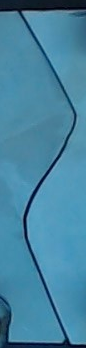

In [ ]:
for im in range(len(aa[0])):
    
    xmin = int(aa[0][0][0])
    ymin = int(aa[0][0][1])
    xmax = int(aa[0][0][2])
    ymax = int(aa[0][0][3])
    crop_img = real_img1[ymin:ymax,xmin:xmax]
    cv2_imshow(crop_img)


    img1 = crop_img.copy()
    img2 = crop_img.copy()
    img3 = crop_img.copy()
    img4 = crop_img.copy()
    img5 = crop_img.copy()
    img6 = crop_img.copy()

In [ ]:
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(img,100,10,10, borderType=cv2.BORDER_CONSTANT)


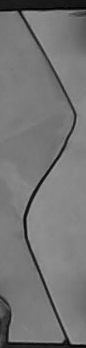

In [ ]:
Image.fromarray(img)

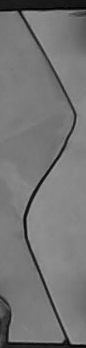

In [ ]:
cv2_imshow(img)

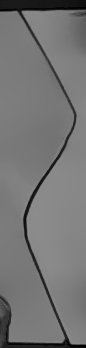

In [ ]:
cv2_imshow(bilateral)

In [ ]:
dog1 = bilateral

In [ ]:
kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(dog1, kernel, iterations=2)

In [ ]:
edges = cv2.Canny(
dog1,90,90)

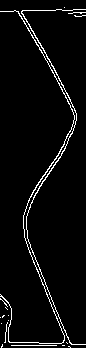

In [ ]:
cv2_imshow(edges)

In [ ]:

rho = 1
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold =5# minimum number of votes (intersections in Hough grid cell)
min_line_length = 5#minimum number of pixels making up a line
max_line_gap =5# maximum gap in pixels between connectable line segments
line_image = np.copy(img1)*0 # creating a blank to draw lines on
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),2)

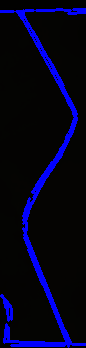

In [ ]:
lines_edges = cv2.addWeighted(img1, 0.025, line_image, 1, 0)
Image.fromarray(lines_edges)

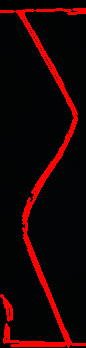

In [ ]:
cv2_imshow(lines_edges)

In [ ]:
edged = edges.copy()

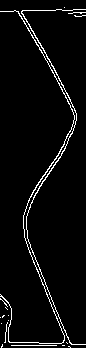

In [ ]:
Image.fromarray(edged)

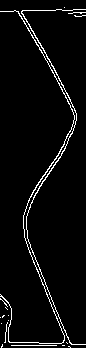

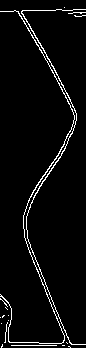

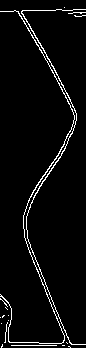

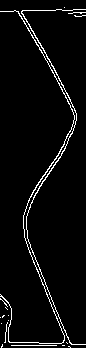

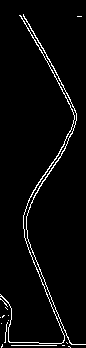

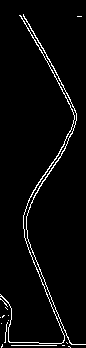

2.147585428298597
-83.65980825409008
67.38013505195934
84.28940686250037


In [ ]:
area = edges.copy()
vline,vline1,hline,hline1,canny,area = borders(img1,lines,edges,area)

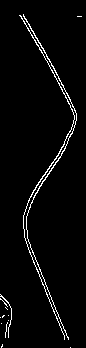

In [ ]:
cv2_imshow(canny)

In [ ]:
output = cv2.connectedComponentsWithStats(
canny, connectivity = 8)
(numLabels, labels, stats, centroids) = output

In [ ]:
mask = np.zeros(img.shape, dtype="uint8")

[INFO] keeping connected component '1'


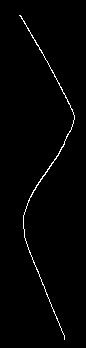

[INFO] keeping connected component '2'


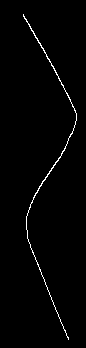

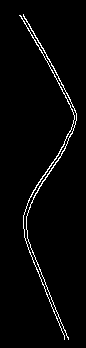

In [ ]:
mask,connect = connected(numLabels, labels, stats, centroids,mask)


In [ ]:
if len(connect)!= 2:
  way = []
  weldgap = []
  img1 = connect[0]
    #img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  img = Image.fromarray(connect[0])
  px = img.load()

  corners = []
  for i in range (img1.shape[0]):
      for j in range (img1.shape[1]):
        if px[j,i] > 240:
          corners.append([j,i])
  img1 =connect[1]
    #img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  img = Image.fromarray(img1)
  px = img.load()

  list1 = []
  for i in range (img1.shape[0]):
      for j in range (img1.shape[1]):
        if px[j,i] > 240:
          list1.append([j,i])  
  cood = []
  if len(corners)>=len(list1):
    pass
  else:
    temp = corners
    corners = list1
    list1 = temp


  points,points1 = series(corners,img1)
  if len(points)!=0:
        points,Final,weld_gap  = perpendicular(points,list1,img3)
        img5,points,points1,e1,e2,e3,e4 = extension(points,points1,vline,vline1,hline,hline1,img5)
        for i in range(len(points)-1):
          cv2.line(img6, (points[i][0],points[i][1]), (points[i+1][0],points[i+1][1]), (0,0,255), 1)
  else:
        points1,Final,weld_gap = perpendicular(points1,list1,img3) 
        img5,points,points1,e1,e2,e3,e4 = extension(points,points1,vline,vline1,hline,hline1,img5)
        for i in range(len(points1)-1):
          cv2.line(img6, (points1[i][0],points1[i][1]), (points1[i+1][0],points1[i+1][1]), (0,0,255), 1)  
  



  

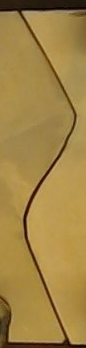

In [ ]:
Image.fromarray(img1)

Applying DoG filter


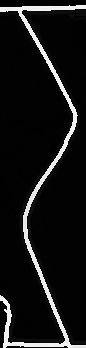

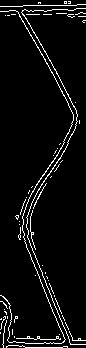

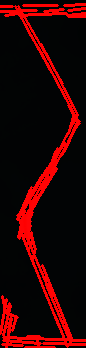

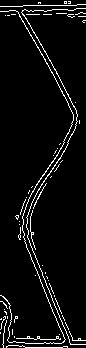

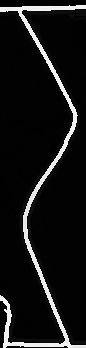

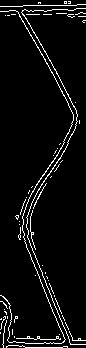

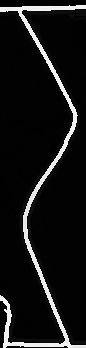

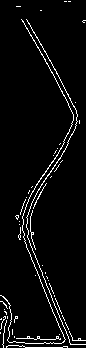

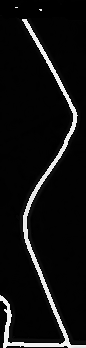

-79.99202019855868
-76.86597769360364
68.19859051364816
1.363927531602958
84.80557109226518
2.0952525646238174
4.635463426902594
-74.05460409907715
-75.96375653207353
2.8624052261118633
-80.21759296819272
-73.3007557660064
24.443954780416497
-81.86989764584403


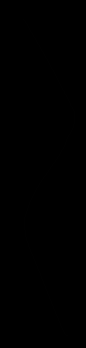

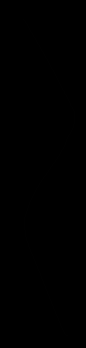

18.072429906542055 10.787383177570094
70.79380053908356 341.8288409703504


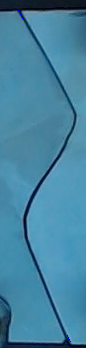

In [ ]:
if len(connect)==1 or len(connect)==2:
  print('Applying DoG filter')
  img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  low_sigma = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
  high_sigma = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
  dog1 = low_sigma - high_sigma
  Image.fromarray(dog1)

  edges = cv2.Canny(dog1,60,60)
  area1 = skimage.morphology.area_opening(dog1, area_threshold=150 ,connectivity=1, parent=None, tree_traverser=None)
  cv2_imshow(area1)
  cv2_imshow(edges)

  rho = 1
  theta = np.pi/180 # angular resolution in radians of the Hough grid
  threshold =10# minimum number of votes (intersections in Hough grid cell)
  min_line_length = 10#minimum number of pixels making up a line
  max_line_gap =10# maximum gap in pixels between connectable line segments
  line_image = np.copy(img1)*0 # creating a blank to draw lines on
  lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
  for line in lines:
          for x1,y1,x2,y2 in line:
              cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),2)

  lines_edges = cv2.addWeighted(img1, 0.025, line_image, 1, 0)
  cv2_imshow(lines_edges)

  import math
  area = area1.copy()
  edges = edges.copy()

  vline,vline1,hline,hline1,canny,area = borders(img1,lines,edges,area)

  area = skimage.morphology.area_opening(area, area_threshold=200 ,connectivity= 1, parent=None, tree_traverser=None)
  canny = skimage.morphology.area_opening(canny, area_threshold=10 ,connectivity=1, parent=None, tree_traverser=None)

  

  
   
    
  ret, bw_img = cv2.threshold(area, 127, 255, cv2.THRESH_BINARY)
  bw_img = bw_img/255
  skeleton = skeletonize(bw_img)
  cv2_imshow(skeleton)
  binary =area > filters.threshold_otsu(area )                                             
  skeleton = skeletonize(binary)
  cv2_imshow(skeleton)
  Image.fromarray(skeleton)



  img9 = Image.fromarray(skeleton)
  px = img9.load()
  corners = []
  for i in range (img1.shape[0]):
    for j in range (img1.shape[1]):
      if px[j,i]> 240:
          corners.append([j,i])
  points,points1 = series(corners,img1) 
  img4,points,points1,e1,e2,e3,e4 = extension(points,points1,vline,vline1,hline,hline1,img5) 
  cv2_imshow(img4) 
            
  #img5,points,points1,e1,e2,e3,e4 = extension(points,points1,vline,vline1,hline,hline1,img5)
  Final = []
  if len(points1)!=0:
            
    for i in range(len(points1)-1):
          cv2.line(img6, (points1[i][0],points1[i][1]), (points1[i+1][0],points1[i+1][1]), (0,0,255), 1) 
          t1 = np.array([[points1[i][0],points1[i][1],1]]).T
          w11 = np.dot(inverse,t1)
          w10 = w11[0]/w11[2]
          w11 = w11[1]/w11[2]
          Final.append([w10,w11])      

  else:
    for i in range(len(points)-1):
          cv2.line(img6, (points[i][0],points[i][1]), (points[i+1][0],points[i+1][1]), (0,0,255), 1) 
          t1 = np.array([[points[i][0],points[i][1],1]]).T
          w11 = np.dot(inverse,t1)
          w10 = w11[0]/w11[2]
          w11 = w11[1]/w11[2]
          Final.append([w10,w11])  
        

  

   

        
        
      
    








In [ ]:
if type(e1)!= str:
  t1 = np.array([[e1,e2,1]]).T
  w11 = np.dot(inverse,t1)
         
  w10 = w11[0]/w11[2]
         
  w11 = w11[1]/w11[2]
  Final.insert(0,[w10,w11])
  try:
    weld_gap.insert(0,'Nil')
  except: 
    pass  
if type(e3)!= str:
  t1 = np.array([[e3,e4,1]]).T
  w11 = np.dot(inverse,t1)
         
  w10 = w11[0]/w11[2]
         
  w11 = w11[1]/w11[2]
  Final.append([w10,w11])
  try:
    weld_gap.append('Nil')
  except: 
    pass  


In [ ]:
if len(points1)!=0:
  way = points1
else:
  way = points
for i in range(len(way)-1) :
    codx1 = xmin+ way[i][0]
    cody1 = ymin+ way[i][1]
    codx2 = xmin+ way[i+1][0]
    cody2 = ymin+ way[i+1][1]
    image = cv2.line(real_img1, (codx1,cody1), (codx2,cody2), (0,0,255), 5)
    
    

    
    

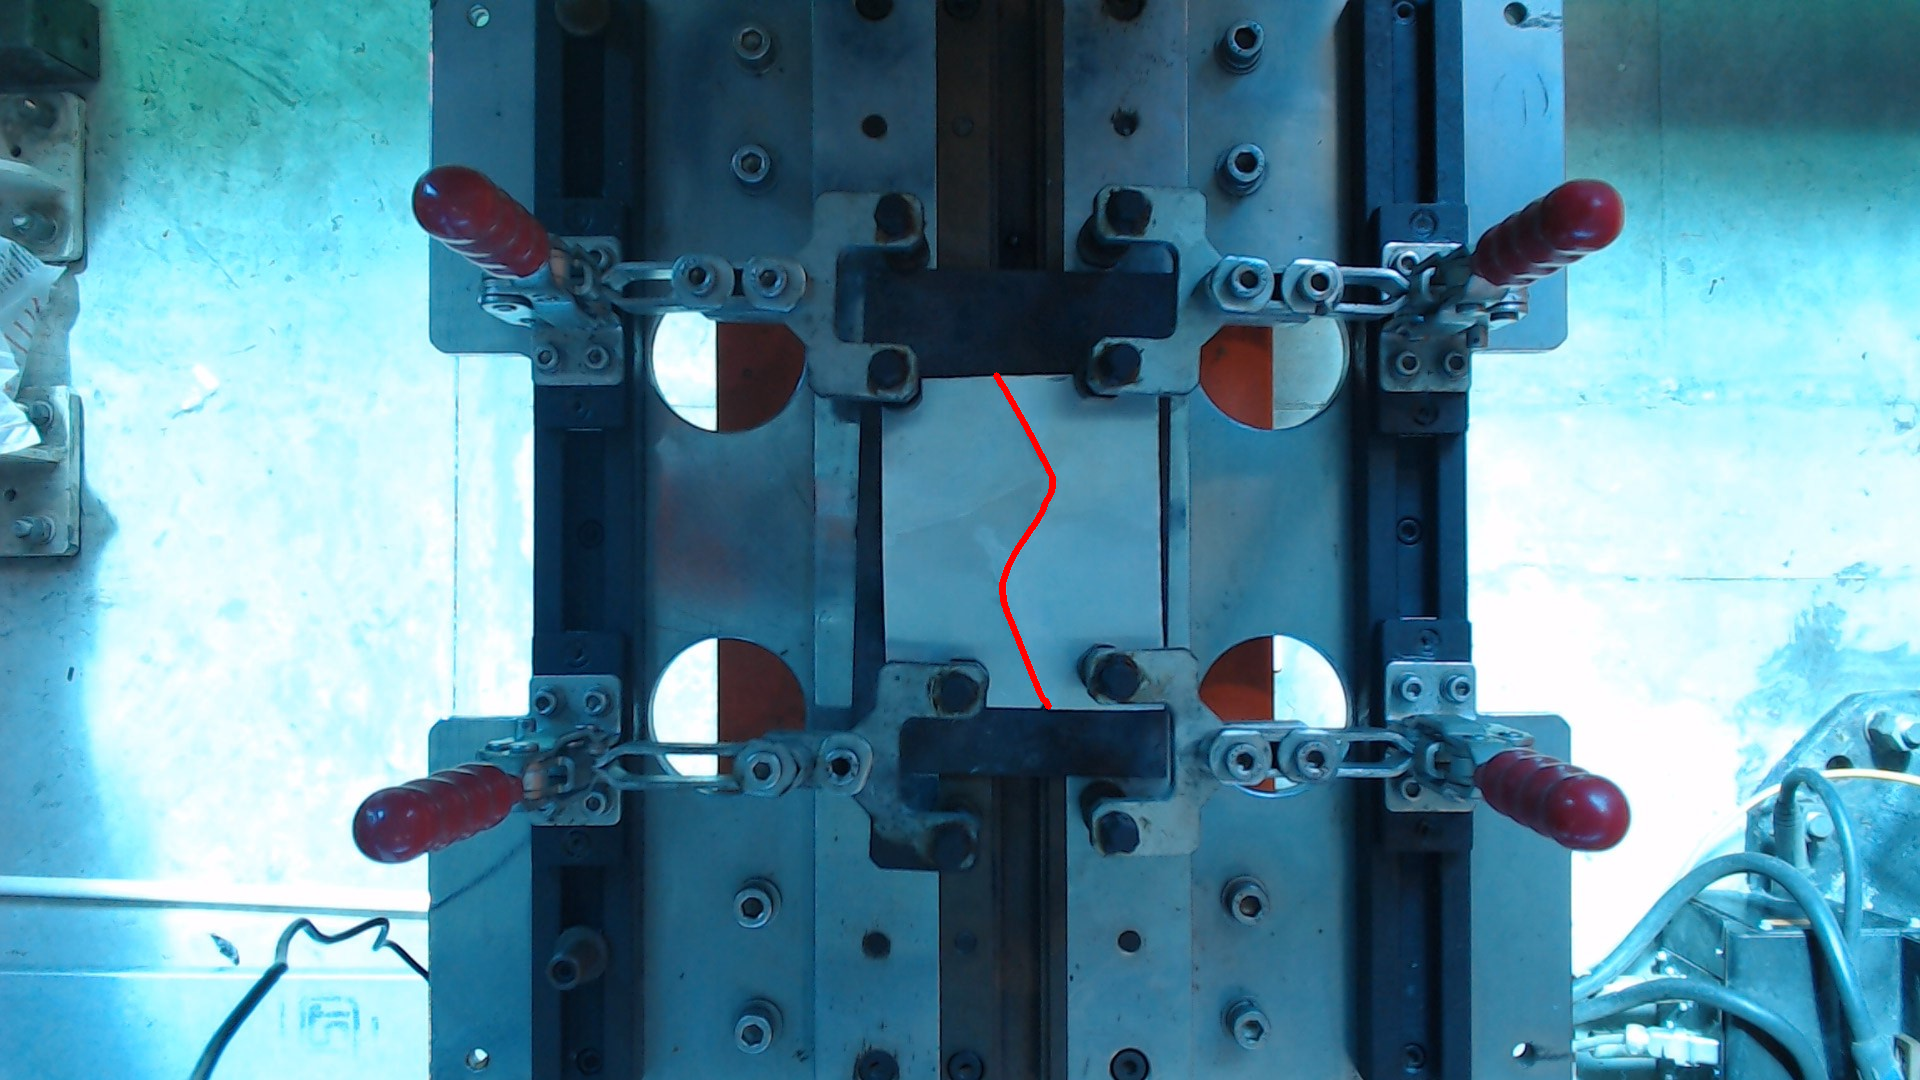

In [ ]:
cv2_imshow(image)

In [ ]:
Finalx = []
Finaly = []
real = Image.fromarray(real_img1)
px = real.load()
#if len(points)!=0:
for items in Final:
    codx = xmin+items[0]
    cody = ymin+items[1]
    
    px[int(codx),int(cody)]=(0,0,255)
    Finalx.append(codx)
    Finaly.append(cody)
    
try:    
    data = {'X_coordinates':Finalx ,'Y_coordinates':Finaly,'Weld_dist':weld_gap}
    df = pd.DataFrame(data)
    df.to_csv('/content/Weld_path' + str(z)+'.csv')
    z = z+1
except: 
    print('ok')
    data = {'X_coordinates':Finalx ,'Y_coordinates':Finaly}
    df = pd.DataFrame(data)
    df.to_csv('/content/Weld_path' + str(z)+'.csv')
    z = z+1    


ok


In [ ]:
length = 0
if len(Finalx)%5==0:
  for i in range(0,len(Finalx)-5,5):
    length = length + ((Finalx[i] - Finalx[i+5])**2 + (Finaly[i] - Finaly[i+5])**2)**.5
else: 
  for i in range(0,len(Finalx)-5,5):
    length = length + ((Finalx[i] - Finalx[i+5])**2 + (Finaly[i] - Finaly[i+5])**2)**.5
  length = length +   ((Finalx[i+5] - Finalx[-1])**2 + (Finaly[i+5] - Finaly[-1])**2)**.5

 
print(length*20) 

[     149.02]


In [ ]:
 
print(length) 

[     7.4508]


In [ ]:
length = 0
if len(Finalx)%5==0:
  for i in range(0,len(Finalx)-1,1):
    length = length + ((Finalx[i] - Finalx[i+1])**2 + (Finaly[i] - Finaly[i+1])**2)**.5
else: 
  for i in range(0,len(Finalx)-1,1):
    length = length + ((Finalx[i] - Finalx[i+1])**2 + (Finaly[i] - Finaly[i+1])**2)**.5
  length = length +   ((Finalx[i+1] - Finalx[-1])**2 + (Finaly[i+1] - Finaly[-1])**2)**.5

 
print(length) 

[     7.9681]


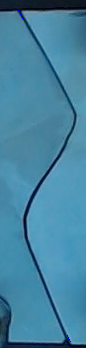

In [ ]:
cv2_imshow(img4)

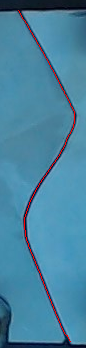

In [ ]:
cv2_imshow(img6)